# Shor's Algorithm

We will begin our study of Shor's algorithm this week. It was first proposed by Peter Shor (a computer scientist/mathematician) at MIT in 1997 and represents a milestone in quantum computing. The algorithm can factor a semi-prime $n = p q$ (product of two prime numbers $p, q$) in time $O(\log(n)^3)$ which is polynomial in the size of $n$ but on a quantum computer.

<div class="alert alert-block" style="background-color:lightcyan ; border-width:1px; border-style:dashed; border-color:black white black white">
Shor, P.W. (1994). "Algorithms for quantum computation: Discrete logarithms and factoring". Proceedings 35th Annual Symposium on Foundations of Computer Science. IEEE Comput. Soc. Press. pp. 124–134. doi:10.1109/sfcs.1994.365700. ISBN 0818665807. S2CID 15291489.
</div>


The algorithm is based on some number theory that we will explain in these notes. We will see how the number theory leads to the quantum circuit.

## Factoring and Order Finding

We are given a number $n = p q$ and seek to find one of its prime factors $p$. Doing so, will help us break the RSA public key cryptosystem. During week \# 1 we noted that it was a hard problem for classical computers. 
The best known classical algorithms have running time $O\left(k^{\mathsf{poly}(\log(k))}\right)$ for a $k$ bit number, wherein $\mathsf{poly}(f(k))$ represents a polynomial of fixed degree involving $f(k)$. For instance, 
$O(f(k)^3)$ complexity would be an example of $\mathsf{poly}(f(k))$. Overall, this represents a super polynomial running time in the size of the number. Currrently, factoring a 2048 bit semi prime is estimated to be impractical (too much time and memory) even using the best known classical computer.

However, the quantum algorithm we present now will solve the problem in time $\mathsf{poly}(\log(k))$.

To factor a number $n$, we will proceed as follows:
  - Choose a number $a  \in [2, n-1]$ that is relatively prime with $n$: $GCD(a, n) = 1$. 
    - Finding such an $a$ is very easy since we can randomly choose a number $a$ in the range. 
    - If $GCD(a, n) \not= 1$ then we note that $a, n$ must have a prime factor in common and this can only be $p$ or $q$ and the factoring problem is already solved!!
 
<div class="alert alert-block" style="background-color:lightcyan; border-width:1px; border-style:dashed; border-color:black white black white">
    The <b> order </b> of   number $a$ w.r.t. $n$ is the <i> smallest </i> number $r > 1$ such that 
    $$a^r \mod n = 1$$
</div>

### Example

Consider $n = 55$ and $a = 4$. Note that $GCD(4, 55) = 1$. Let's take the powers of $4$ modulo $55$:

$$ 4^1 \bmod 55 = 4,\ 4^2 \bmod 55 = 16,\ 4^3 \bmod 55 = 9,\ 4^4 \bmod 55 = 36,\ 4^5 \bmod 55 = 34,\ 4^6 \bmod 55 =  26, \ldots$$

Will we ever get to a number $r$ such that $4^r \bmod 55 = 1$? Let's use Python and find out:



In [1]:
i = 1
m = 4
print(f"{i}, {m}")
while m != 1:
    i = i + 1
    m = (m * 4) % 55
    print(f"{i}, {m}")

1, 4
2, 16
3, 9
4, 36
5, 34
6, 26
7, 49
8, 31
9, 14
10, 1


Indeed, we do find that $4^{10} \bmod 55 = 1$. Thus the order of $4$ w.r.t. $55$ is $10$.

It is easy to see that the order of $a$ w.r.t $n$ exists.

__Claim__ For any number $a \in [2, n-1]$ there exists a natural number  $r \in [2, n-1]$ such that $a^r \mod n = 1$.

__Proof__ We already saw that $a^{\varphi(n)} = 1 \mod n$ where $\varphi(n)$ is the Euler totient function. Therefore, $r \leq \varphi(n) \leq n-1$.

## From Order Finding to Factoring

Suppose we know the order $r$ of a number $a$ and $r$ happens to be an even number $r = 2k$.

$$a ^{2k} \bmod n = 1,\ \text{or in other words}\ (a^{k})^2 - 1 \bmod n = 0$$

Since $x^2 -1 = (x+1)(x-1)$, we have 
$$ (a^{k})^2 - 1 \bmod n = 0\ \mathsf{if\ and\ only\ if}\  (a^k -1) (a^k +1 )\mod n = 0$$

First off $a^k -1 \bmod n \not= 0$ since $r$ is the smallest number such that $a^r \bmod n = 1$. Since $k = r/2$, we cannot have $a^k \bmod n = 1$. Therefore, $a^k -1 \bmod n \not= 0$. 

This means that there are two possibilities left:
  - $a^k + 1 \bmod n = 0$, OR
  - $a^k -1 \bmod n$ and $a^k + 1 \bmod n$ have prime factors in common with $n$.
 
If the second possibility happens, we can extract a prime factor $p$ or $q$ by simply computing  $GCD(a^k-1, n)$, which is quite easy to do.


### Example

Returning back to the example. $4^{10} \bmod 55 = 1$. We have that $4^5 + 1 \mod 55 = 35 \not= 0$ and 
thus, $4^5 -1\mod 55 = 33$ and $GCD(33, 55) = 11$ which yields a prime factor. 


Therefore, we are interested in the following two items "lining up":
  - Number $a$ relatively prime with $n$ such that the order $r$ of $a$ is even.
  - $a^{r/2} +1 \mod n \not = 0$.
  
If this happens, then $a^{r/2} -1$ will have a prime factor in common with $n$ which can be found by computing 
$GCD(a^{r/2} -1, n)$. 

__Fact:__ For any semi prime number $n$ and randomly chosen $a$ relatively prime with $n$, the probability that 
its order $r$ is even and $a^{r/2} + 1 \bmod n \not= 0$ is at least $0.5$.

Therefore, at least half the time, we can use the order of $a$ to extract a prime factor of $n$.


In [10]:
def gcd(m, n):
    if m < n:
        (m,n) = (n,m)
    assert m > 0
    assert n >= 0
    while n != 0:
        (m, n) = (n, m%n)
    return m

def modular_exponentiate(a, k, n): # a^k \mod n
    r = a
    m = 1
    while k != 0:
        if k%2 == 1:
            m = (m * r)%n
        k = k // 2
        r = (r * r) % n
    return m

def find_order(a, n):
    r = 1
    x = a
    while x != 1:
        x = (x * a) % n
        r = r + 1
    return r

def factor_using_order_finding(a, n):
    r = find_order(a, n)
    print(f'Order of {a} w.r.t {n} = {r}')
    if r %2 == 0:
        m = modular_exponentiate(a, r//2, n)
        return gcd(m-1, n)
    print('Bad luck: odd order')
    return 1

In [11]:
f = factor_using_order_finding(2, 55)
print(f'Found factor= {f}')

Order of 2 w.r.t 55 = 20
Found factor= 11


In [12]:
f = factor_using_order_finding(6, 55)
print(f'Found factor= {f}')

Order of 6 w.r.t 55 = 10
Found factor= 5


In [13]:
f = factor_using_order_finding(16, 55)
print(f'Found factor= {f}')

Order of 16 w.r.t 55 = 5
Bad luck: odd order
Found factor= 1


In [14]:
n = 3589
a = 75
f = factor_using_order_finding(a, n)
print(f'Found factor= {f}')


Order of 75 w.r.t 3589 = 4
Found factor= 37


In [15]:
n = 758717
a = 5
f = factor_using_order_finding(a, n)
print(f'Found factor= {f}')


Order of 5 w.r.t 758717 = 6308
Found factor= 761


In [16]:
n = 758717
a = 1998
f = factor_using_order_finding(a, n)
print(f'Found factor= {f}')


Order of 1998 w.r.t 758717 = 63080
Found factor= 997


In fact, if you tried a few experiments using randomly generated $a$ for a given $n$, you will find that the 
conditions stated above : 
 - Order $r$ is even and 
 - $a^{r/2} +1 \bmod n \not= 0$
 
are true of most of the chosen $a$ with very few violations. We can prove these conditions will be true for randomly chosen $a$  with probability > $50\%$.

### Theorem and Proof 

The proof that the conditions above occur with high probability uses a few ideas from number theory that we have not formally covered yet but the proof itself is rather simple. We will present it here  but feel free to __skip this section__. The proof has been adapted to cover just the case where $n = p q$.

<fieldset class="alert alert-block" style="border-color:black white black white; background-color:lightcyan">
<legend style="border: 2px black solid; padding:0.5em 0.5em; background-color:cyan">Theorem</legend>
    Let $n = p q$ be a semi-prime wherein $p, q$ are <i> odd </i> prime numbers. Let $a$ be a randomly chosen number that is relatively prime to $n$. Let $r$ be the order of $a$: i.e, the smallest (non-zero) natural number such that $a^r \bmod n = 1$. The probability that $r$ is even and $a^{r/2} +1 \bmod n \not= 0$ is at least $\frac{1}{2}$.
</fieldset>

### Background Facts 

First, we will recall a very important theorem called the _Chinese remainder theorem_, but here we will deal with just the special case for $n = pq$. 

Consider the system of equations:
$$\begin{array}{rl}
 x \bmod p = n_1 \\ 
 x \bmod q = n_2 \\ 
 \end{array}$$ 
For two numbers $n_1, n_2 \geq 1$. There exists a unique number $a \in [1, n-1]$ such that $ x = a$ is a solution to the equations above. 

<fieldset class="alert alert-block" style="border-color:black white black white; background-color:lightcyan">
As an example, let $n = 15 = 3 \times 5$. We are looking for a number $x$ such that $x \bmod 3 = 1$ and $x \bmod 5 = 2$. Note that $7$ is the only number in the range $[1,15]$ that satisfies these equations.
</fieldset>


Next, we will have to use some facts about the multiplicative group of numbers $Z_p = \{1, \ldots, p-1\}$ modulo $p$ where $p$ is an odd prime number. Note that this group is _cyclic_. I.e, has a generator $g$ such that each number $x \in Z_p = g^k$ for some $k$. It follows that the order of $g$ must be $p-1$.

<fieldset class="alert alert-block" style="border-color:black white black white; background-color:lightcyan">
    Take $p = 7$. The group $Z_7 = \{1,2, \ldots, 6\}$ under the operation of multiplication. It is generated by $g = 3$. 
    \[ g^2 \bmod 7 = 2, g^3 \bmod 7= 6, g^4 \bmod 7 = 4, g^5 \bmod 7 = 5, g^6 \bmod 7 = 1 \]
</fieldset>


Let $r$ be the order of $x$ ($= g^k$) modulo $p$. We have that $x^r \bmod p = 1$. In other words, $(g^{k})^r \bmod p = 1$ or $g^{kr} = 1 \bmod p$. In other words, $(p-1)$ must divide $kr$. Suppose $k$ is odd, then $r$ must be even since $p-1$ is even.  Thus, we conclude that for a randomly chosen element of $Z_p$, its order modulo $p$ must be even with probability at least $\frac{1}{2}$.

In fact, we need to prove something stronger.
Let $x$ be such that the order $r = 2^{d} t$ where $t$ is an odd number. In other words, we can keep successively dividing the order $r$   by $2$ for at most _d_ times.  If $d = 0$ then $r$ is odd. 

Suppose we fix some value of $d$. The probability that a randomly chosen $x$ has order $r = 2^d t$ ($t$ is odd) is at most $\frac{1}{2}$. This is because, for the order $r$ to be $2^d t$, we need to choose $x= g^k$ such that $(p-1)$ divides $k \times 2^d t$. Suppose $(p-1)$ can be written as $2^{d'} t'$ for some odd number $t'$ and $d' \geq 1$, we note that $d \leq d'$ and $k $ must be of the form $2^{(d'-d)} k'$ for odd number $k'$. There are at most $\frac{p-1}{2^{1 + d'-d}}$ such numbers. The probability of choosing such a number is at most $\frac{1}{2}$ since $d' \geq d$.




### Proof 
Let's get back to the proof of the theorem.

Using the Chinese remainder theorem, we condlude that any $a$ that is relatively prime with $n$ can be represented uniquely by two numbers $a_1 = a \bmod p$ and $a_2 = a \bmod q$. 

Let $r_1$ be the order of $a_1$ modulo $p$ and $r_2$ be the order of $a_2$ modulo $q$. 

$$ a^{r_1} \bmod p = a_1^{r_1} \bmod p = 1,\;\;\text{and}\;\;a^{r_2} \bmod p = a_2^{r_2} \bmod q = 1 \,.$$

The order $r$ of $a$ modulo $n$ is in fact the least common multiple (LCM) of $r_1, r_2$. Why is that?
This is because $a^r \bmod n = 1$. Therefore, $a^r \bmod p = 1$ and $a^r \bmod q = 1$ (prove this as a simple exercise in modular arithmetic). Thus, by definition of order, $r_1$ divides $r$ and $r_2$ divides $r$. The smallest such number is the LCM of $r_1, r_2$.

Let $r_1 = 2^{d_1} t_1$ and $r_2 = 2^{d_2} t_2$ where $t_1, t_2$ are odd. We have $LCM(r_1, r_2) = 2^{\max(d_1, d_2)} LCM(t_1, t_2)$.


Therefore, $r$ will be odd iff both $r_1, r_2$ are odd. In other words, $d_1 = d_2 = 0$.

Suppose $r$ is even and suppose $a^{r/2}  + 1 \bmod n = 0$? Note that this implies that $a_1^{r/2} = -1 \bmod p$ and $a_2^{r/2} = -1 \bmod q$.  This means that $r_1, r_2$ both divide $r$ (since it is $LCM(r_1, r_2)$) but neither divides $r/2$. This can only happen if $d_1 = d_2$. Let us suppose $d_1 > d_2$ (the argument for the  case when $d_2 > d_1$ is symmetric). We have $r = 2^{d_1} LCM(t_1, t_2)$. Therefore, $r/2 = 2^{d_1 - 1} LCM(t_1, t_2)$: But since $d_2 < d_1$, we have $r_2$ must divide $r/2$ which we assumed did not happen. 
Thus, we conclude that $d_1 = d_2$.


Combining, we note that the order $r$ is odd only if $d_1 = d_2 = 0$ and $a^{r/2} +1 \bmod n = 0$ only if 
$d_1 = d_2 > 0$. However, for a fixed $d = d_1 = d_2$ the probability that the orders of $r_1 = 2^d t_1$ and 
$r_2 = 2^d t_2$  is at most $\frac{1}{2}$.  Therefore, the overall probability that a random choice of $a$ fails is at most $\frac{1}{2}$.  The probability of success is at least $1 - \frac{1}{2} = \frac{1}{2}$. __QED__


### Back to Shor's Algorithm

<div class="alert alert-block" style="border-color:black white black white; background-color:lightcyan">
If we can find the order $r$ of a number $a$ w.r.t $n$ ($a$ is relatively prime to $n$), then 
    we can use the order to find a factor with high probability.
</div>

However, finding the order $r$ is a hard problem for classical computer. As we saw above, the simple algorithm  runs through $r$ from $2$ to $n-1$ and is no better than trial division. In practice, we find the problem of computing $r$ to be as hard as factoring.

However, we can use a quantum computer to find the order $r$ efficiently and this is the high level picture of Shor's algorithm.

<div class="alert alert-block" style="border-color:black; background-color:lightcyan ; border-style:dashed">
<ol>
  <li>  Choose a random $a \in [2, n-1]$. If $GCD(a, n) \not= 1$ then we have found our prime factor!
    <li>  (Assume $GCD(a, n) = 1$). <b> Use  quantum computer </b> to find the order $r$ of $a$ modulo $n$.
  <li>  If $r$ is even and $a^{r/2} + 1 \bmod n \not= 0$: 
      <ol>
     <li>   Computing $GCD(a^{r/2} -1, n)$  will yield a factor of $n$.
      </ol>
 <li>  If condition in previous step fails, repeat step 1.
    </ol>
</div>

Thus Shor's algorithm is a combination of a "classical outer loop" that uses a quantum algorithm to find the order of $a$ efficiently.

## Order Finding On a Quantum Computer

The key step in Shor's algorithm is to find the order $r$ of $a$ w.r.t $n$ using a quantum computer.  This is done by considering the function 
$$\newcommand\ket[1]{\left| #1 \right\rangle}$$
$$ f(j) = a^j \bmod n $$

where $j$ is a natural number. The order $r$ of $j$ is the _period_ of the function $f$:
$$ \text{for all}\ j \in \mathbb{N}:\; f(j + r) = f(j)\,.$$
This is easy to see why:
$$f(j+r) = a^{j+r} \bmod n = (a^j \bmod n) \underset{= 1}{\underbrace{(a^r \bmod n)}} \bmod n = a^j \bmod n = f(j)$$

Therefore, the quantum algorithm attempts to find the period $r$ of the function $f_{a,n}(j) = a^j \bmod n$. 
To do so, we proceed in the following steps:

  0. Choose the number of bits $m$ such that $2^m > n$.
  1. Create a quantum circuit $U_f$ that implements $f$: 
   $$ U_f \left(\ket{j} \otimes \ket{0^m}\right) = \left(\ket{j} \times \ket{f(j)}\right) $$
     In other words, $U_f$ takes an input $\ket{j}$ and $m$ result qubits which are initialized to $0$ and yields the input unchanged but the output is $\ket{f(j)}$.
  2. Run $U_f$ on the uniform super position $\ket{x} = \frac{1}{\sqrt{2^m}} \sum_{j=0}^{2^m-1} \ket{j}$. Note $\ket{j}$ is short hand for the $m$-bit binary representation of the number $j$ which we will write $j_{m-1} \cdots j_0$.
     This will yield $\ket{\psi}:\ \frac{1}{\sqrt{2^m}} \sum_{j=0}^{2^m-1} \ket{j} \otimes \ket{f(j)}$. 
  3. Measure the output register for $U_f$.
  
  
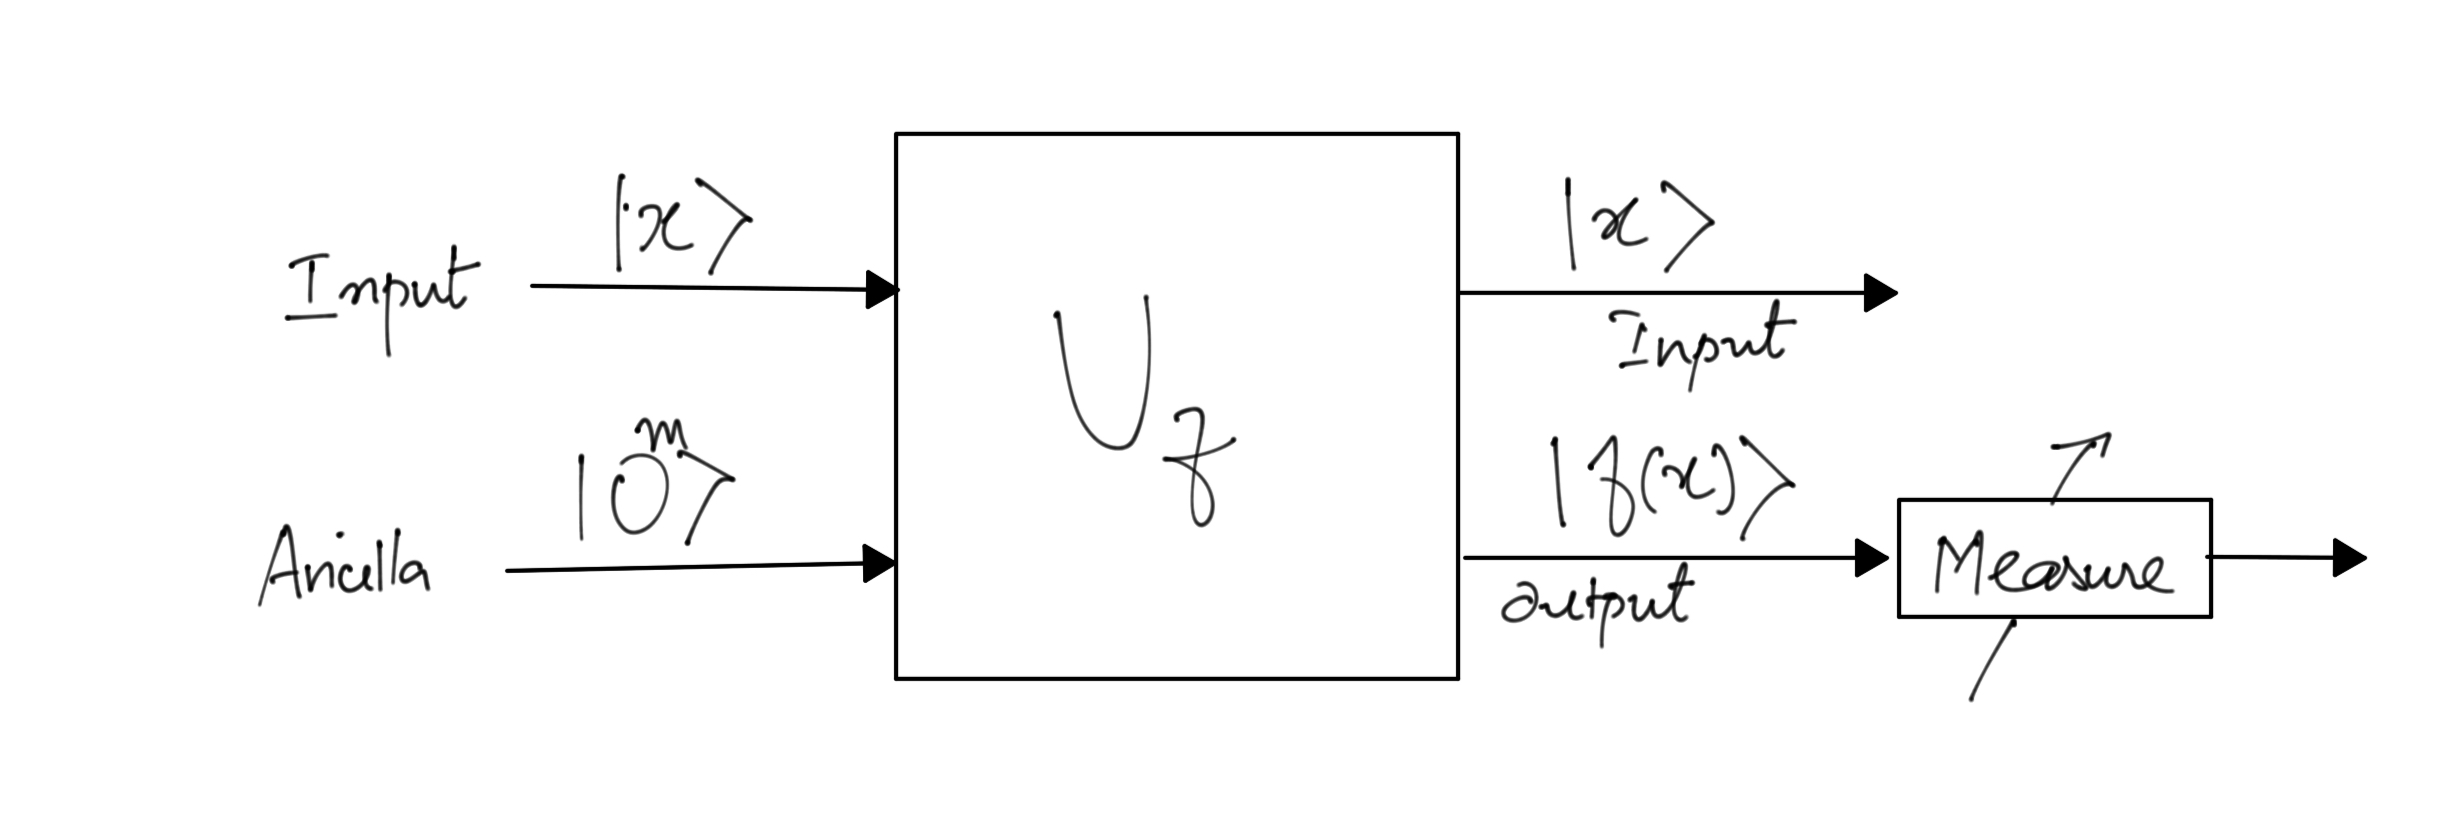</img>



The figure above shows the circuit this far. Note that the input $\ket{x}$ represents the uniform super position which is computed using Hadamard operation on $\ket{0\cdots 0}$. 
The key here is suppose we measure some value $k$ at the output of $U_f$. If we performed such a measurement, the outputs collapse to $\ket{k}$. 

__What happens to the inputs?__

The inputs will collapse into a super position of those states $j$ such that $f(j) = k$ wherein $k$ is the output we just got. The amplitudes of all the states are the same and is omitted for convenience of presentation.

$$ \ket{\psi}= \sum_{  f(j) = k }  \ket{j} $$

Since $f(j)$ is periodic, the input super position will be periodic of the form:

$$\ket{\psi} =  \sum_{  f(j) = k }  \ket{j} =  \sum_{l=1}^{\lfloor 2^m/r \rfloor} \ket{x_0 + l r} $$

The image below illustrates this process:

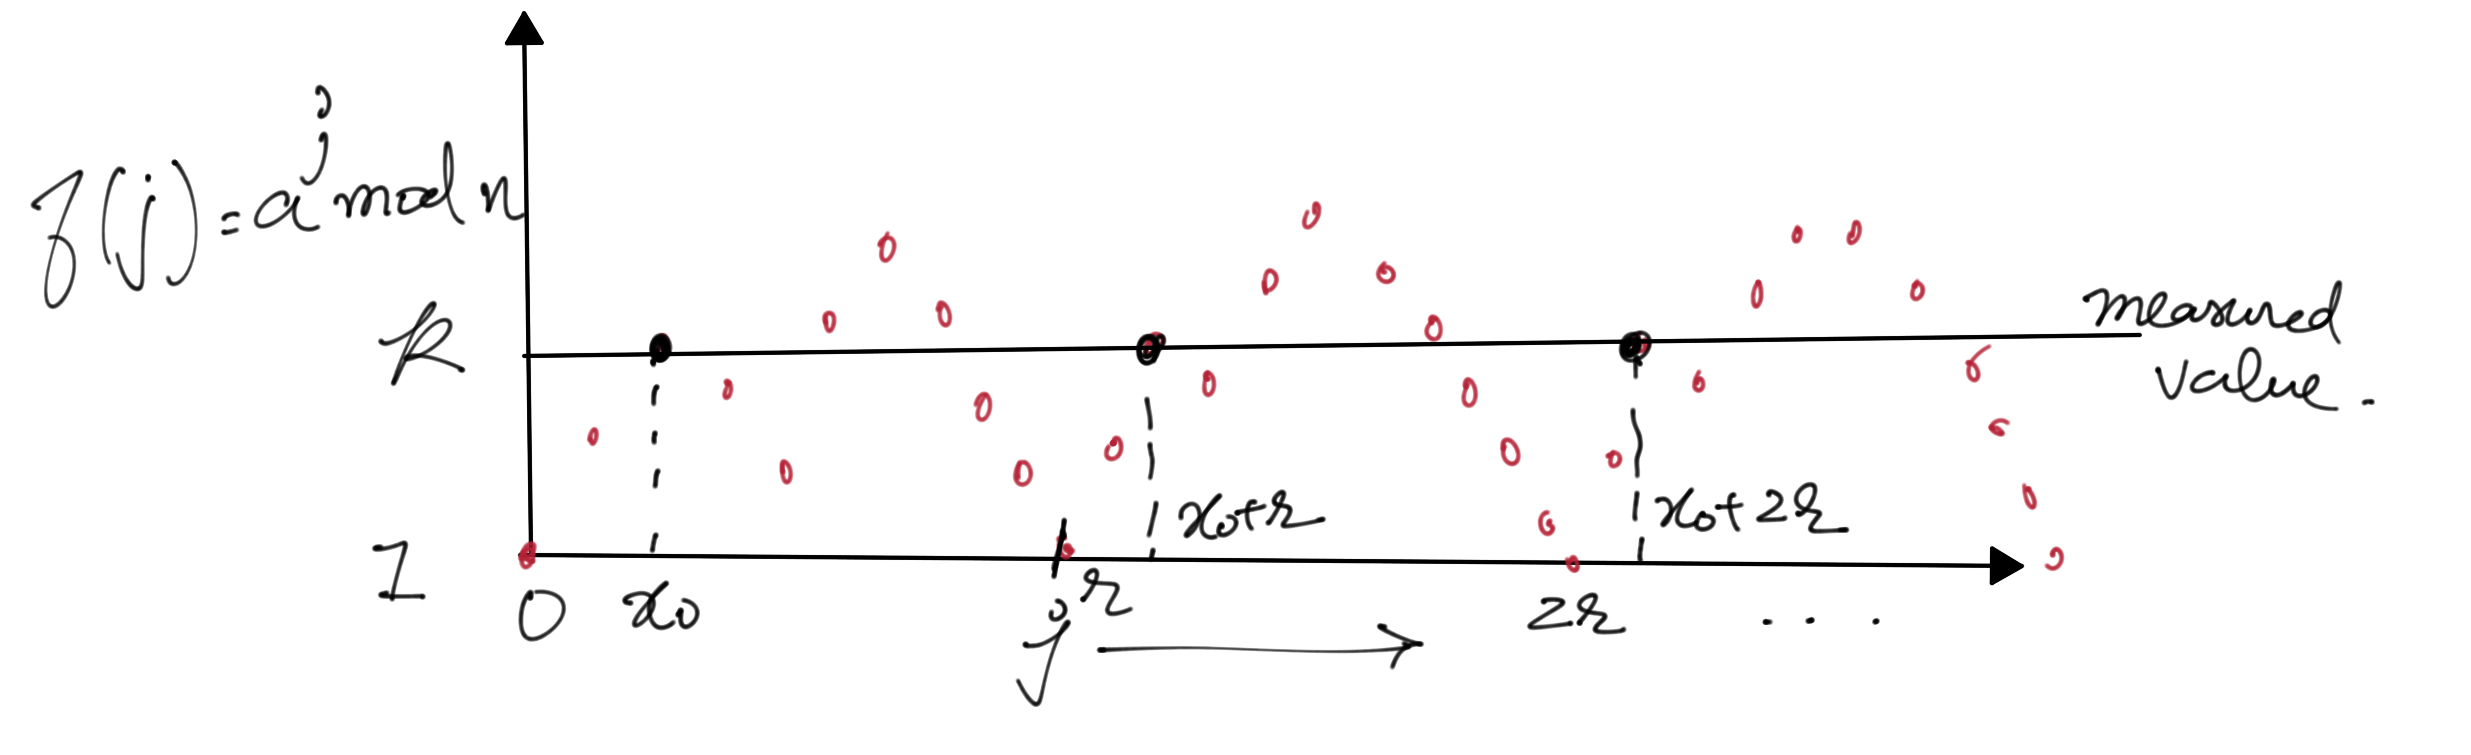 </img>

Therefore, after measurement of the outputs, the inputs $\ket{\psi}$ form a _periodic super position_ of the form 
$$\ket{\psi} = \frac{1}{\sqrt{K}} \left( \ket{x_0} + \ket{x_0 + r} + \ket{x_0 + 2r} + \cdots + \ket{x_0 + (K-1)r}\right)$$
wherein $x_0$ is some number between $0$ and $r-1$, while $r$ is the period we wish to find. 

It is tempting to just measure $\ket{\psi}$ but that will not yield anything useful since it will simply yield some value $x_0 + jr$ for some $j$. Using this, we cannot estimate $r$.

_We need an approach to measure the period $r$ of the superposition $\ket{\psi}$_


## Quantum Fourier Transform

This is where the key step of using a Fourier transform comes in. The idea behind quantum Fourier transform is to compute the Fourier transform of the amplitudes of a superposition $\ket{\psi}$.

In other words for an $k$ qubit superposition input of the form 

$$\ket{\varphi}= a_0 \ket{0} + a_1 \ket{1} + \cdots + a_{2^k-1} \ket{2^k - 1}$$

we wish to compute the QFT which yields

$$\ket{\omega} = A_0 \ket{0} + A_1 \ket{1} + \cdots + A_{2^k-1} \ket{2^k-1}$$

wherein 

$A_0, \ldots, A_{2^k-1}$ represent the Fourier transform of the amplitudes $a_0, a_1, \ldots, a_{2^k-1}$.

$$A_j = \frac{1}{\sqrt{2^k}} \sum_{i=0}^{2^k-1} \omega_{2^k}^{ij} a_i $$

Wherein $\omega_{2^k} = \exp\left( \frac{2 \pi i}{2^k} \right)$ is a generator of the $2^{k}$ roots of unity.

The idea is to treat the amplitudes of the superposition as a signal and compute its Fourier transform which yields another super position whose amplitudes are the various coefficients of the Fourier transform. The key observation is this:

<div class="alert alert-block alert-info" style="background-color:lightcyan; border-color: black white black white">
    Fourier tranform of a periodic function (or superposition) reveals information about its period.
</div>

### Illustration of Fourier Transform

Consider a simple example of a periodic superposition 
$$ \ket{5} +  \ket{21} + \ket{37} +  \ket{53} $$ 
with a period of $16$.

<StemContainer object of 3 artists>

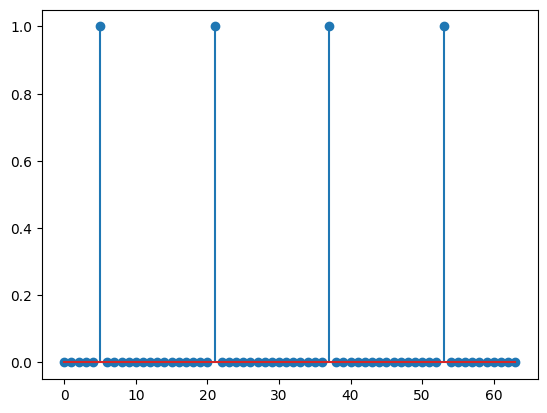

In [26]:
from numpy.fft import fft
from matplotlib import pyplot as plt
values= [5, 21,37, 53]
initial_super_position = [1 if j in values else 0 for j in range(64)]
plt.stem(initial_super_position)

<StemContainer object of 3 artists>

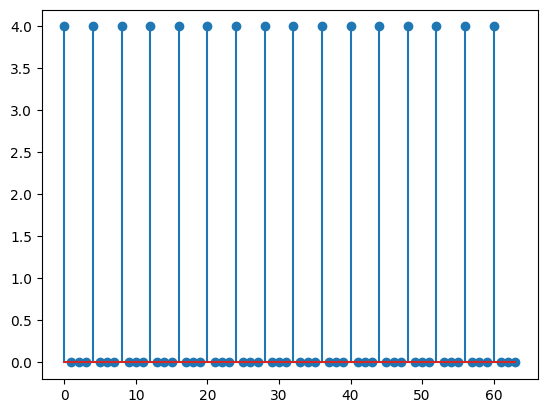

In [27]:
fft_values = fft(initial_super_position, 64)
plt.stem([abs(x) for x in fft_values])

The FFT is periodic with a period of $4$. This is no accident: the period of the original signal was $16$ and the the value of $N = 2^m = 64$. The period of the FFT is $64/16 = 4$.

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
    If $r$ divides $2^m$ then the FFT of a periodic superposition with period $r$ will have a peaks at
    intervals of $\frac{2^m}{r}$.
</div>

However, even if $r$ does not divide $2^m$ the period of the FFT will be very close to $\frac{2^m}{r}$ even though it is no longer an integer. 

As an example, consider 

$$\ket{\psi} = \ket{3} + \ket{14} + \ket{25} + \ket{36} + \ket{47} + \ket{58} $$


<StemContainer object of 3 artists>

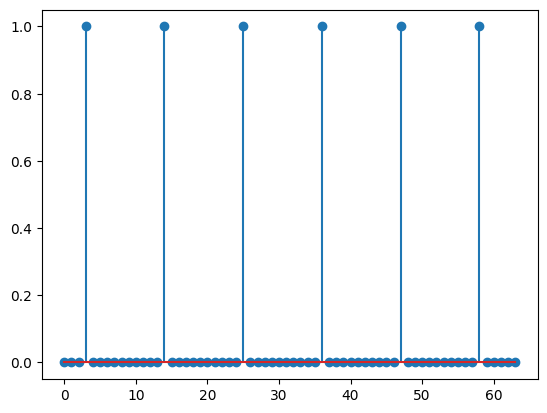

In [28]:
from numpy.fft import fft
from matplotlib import pyplot as plt
values= [3, 14, 25, 36, 47, 58]
initial_super_position = [1 if j in values else 0 for j in range(64)]
plt.stem(initial_super_position)

<StemContainer object of 3 artists>

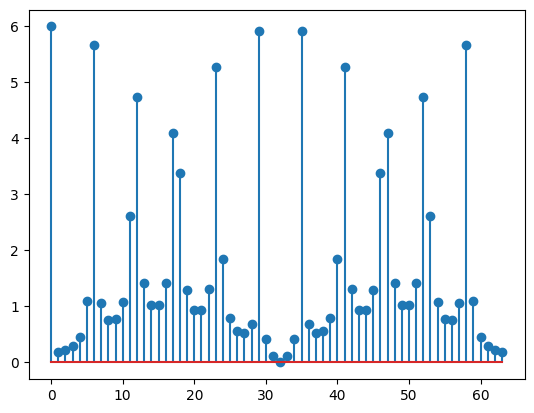

In [29]:
fft_values = fft(initial_super_position, 64)
plt.stem([abs(x) for x in fft_values])

Notice that although $64/11 \approx 5.8$ is not an integer, we still have the Fourier transform peaks at distances of roughly $6$ steps from each other and occassionally $5$ steps.

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
    Even if $r$ does not divide $2^m$, applying FT to the amplitudes of $\ket{\psi}$ yields a super-position with peaks at whole numbers that are near multiples of $\frac{2^m}{r}$.
</div>

The overall circuit for Shor's algorithm is as follows:

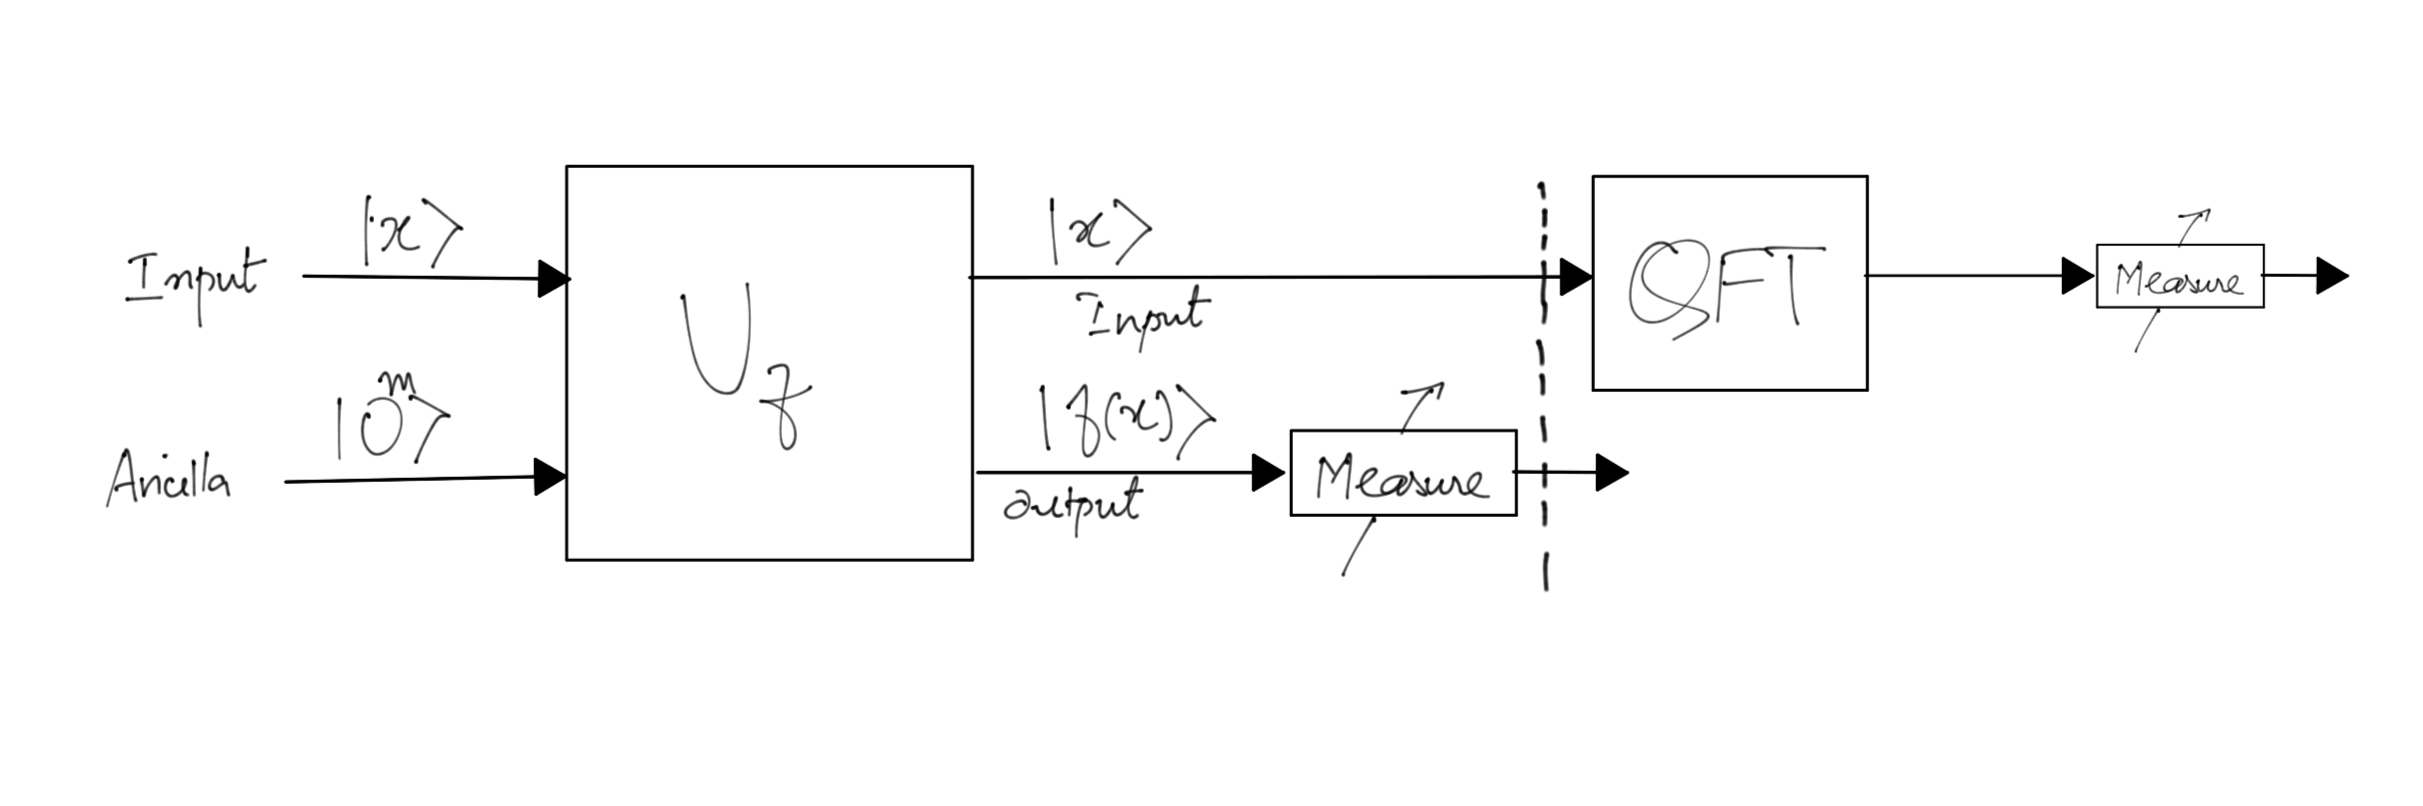</img>


The measurement of the super position $\ket{\psi}$ after applying the QFT to it yields a number that is close to  $\frac{j 2^m}{r}$. In fact, with very high probability, the measurement will yield something close to $\frac{j 2^m}{r} \pm 0.5$.  Using this, we can recover $r$ quite easily since we know $2^m$ and we can use a _continued fraction_ method to recover $r$ as we will illustrate in the problem set for this week. 


## High-Level Summary of Shor's Algorithm 

At a high level, Shor's algorithm relies on choosing a random $a$ relatively prime with $n$.  
  - We use a quantum circuit that will find the order $r$ which is the smallest non-zero number such that $a^r \bmod n = 1$. 
  - Once we find $r$, we note that with high probability $r$ is even and $a^{r/2} -1$ has a prime number common factor with $n$. Therefore, computing $GCD(a^{r/2} -1, n)$ reveals one of the factors of $n$. 
    - If we fail to get a factor, we simply repeat with a different random choice of $a$. We are guaranteed to succceed within a fixed number of trials with very high probability.
    
The quantum part of Shor's algorithm attempts to find the order $r$ given $a,n$ very fast using a quantum circuit. Let function $f(x) = a^x \bmod n$. 
  - Let $m$ be the number of bits to represent $n$: $2^m > n$.
  - First we prepare a quantum circuit that calculates $f$ by translating its classical circuit using and/or and not gates into a quantum circuit represented by a unitary operator $U_f \ket{j}\ket{0} = \ket{j} \ket{f(j)}$.
  - Measure the output register of $U_f$. It will yield some output measurement $k$ that we discard.
  - As a result of the partial measurement of the output, the input collapses into a periodic super position of the form $\ket{\psi} = \frac{1}{\sqrt{K}} \left( \ket{x_0} + \ket{x_0 + r} + \ket{x_0 + 2r} + \cdots + \ket{x_0 + (K-1)r}\right)$.
  - Compute the Quantum Fourier Transform (QFT) of $\ket{\psi}$. Since the input super position is periodic with period $r$, the QFT will produce a result $\ket{\varphi}$ whose amplitudes peak at or near integer multiples of the frequency $\frac{2^m}{r}$.
  - Measure the output of the QFT circuit. It will yield some number $\ket{l}$ which will be close to  a number of the form $j \frac{2^m}{r} \pm 0.5$.
  - Use a continued fraction method to recover $r$. This will succeed roughly 40\% of the time (we will not carry out this analysis). If we fail to recover $r$ simply rerun the quantum steps until we do. 
 
 
 
# Quantum Circuit for $U_f$

We will briefly describe the quantum circuit for $U_f$ to compute $f(j) = a^j \mod n$. Note that $a, n$ are already "hard-wired" when we print out the circuit. The key is to take the bitwise representation for $j$: 
$j = [j_{m-1}, \ldots, j_0]$. Next we use a repeated square and modulo circuit.

  - $\mathsf{SquareAndModulo}(x)= x^2 \bmod n$
  
The $\mathsf{SquareAndModulo}(x)$ circuit for a $m$ bit input $x$ can be computed using $O(m^2)$ gates. 

We will repeatedly compute the following sequence
$$a_0 = a, a_1 = \mathsf{SquareAndModulo}(a), a_2= \mathsf{SquareAndModulo}(a_1), \ldots, a_{m-1} = \mathsf{SquareAndModulo}(a_{m-2})$$
Next if $j_l = 1$ for the $l^{th}$ bit of the input $j$, we add $a_j$ to the output register. 

As a result, we can compute the overall result with $m$ applications of $\mathsf{SquareAndModulo}$ circuit each of which uses $O(m^2)$ gates. Followed by at most $m$ additions of $m$ bit registers, with each addition taking $O(m)$ gates. 

This requires $O(m^3)$ gates in total.

The quantum version of this circuit can be built systematically from the classical version using our approach from last week of translating classical circuits into quantum ones. However, we will need roughly $O(m^3)$ ancillary qubits as well. 

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
    The quantum circuit for $U_f$ is the most expensive part of Shor's algorithm since we will need to implement $O(m^3)$ quantum gates and also $O(m^3)$ ancillary qubits.
</div>

For certain fixed values of $a, n$, the quantum circuit can be drastically simplified (but these special cases will happen very rarely). We will explore that as part of the problem set as well.

Coming up, we will explore the circuit for quantum fourier transform, which is going to be quite useful for algorithms beyond this one.